In [1]:
%pip install tensorflow-datasets


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
mnist_dataset = tfds.load("mnist", as_supervised=True)

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# reserving 10,000 images for validation from training to make sure test set is untouched until end
x_val = x_train[-20000:]
y_val = y_train[-20000:]
x_train = x_train[:-20000]
y_train = y_train[:-20000]

## reshaping the input for X but not y (since y is ground truth labels) to add extra dimension for channel = 1(grayscale not RGB)

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)



In [6]:
print("x-train dimensions:", x_train.shape)
print("y-train dimensions:",y_train.shape) # ground truth labels for training

print()

print("x-val dimensions:", x_val.shape)
print("y-val dimensions:",y_val.shape) # ground truth labels for training

print()

print("x-test dimensions:", x_test.shape) # ground truth labels for testing
print("y-test dimensions:",y_test.shape)

x-train dimensions: (40000, 28, 28, 1)
y-train dimensions: (40000,)

x-val dimensions: (20000, 28, 28, 1)
y-val dimensions: (20000,)

x-test dimensions: (10000, 28, 28, 1)
y-test dimensions: (10000,)


In [7]:
type(x_train)

numpy.ndarray

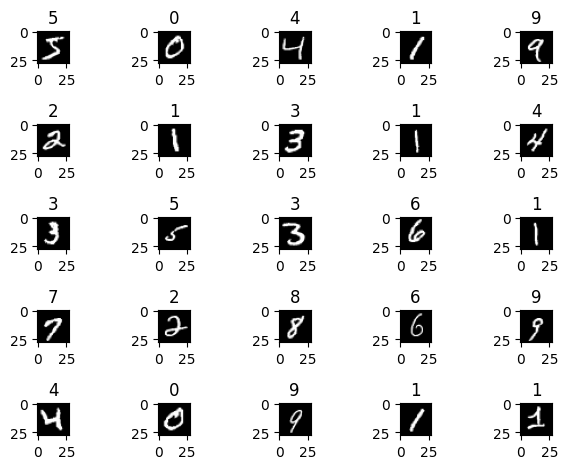

In [8]:
for i in range(25):
    img = x_train[i]
    label = y_train[i]

    plt.subplot(5, 5, i+1)
    plt.title(str(f"{label}")) # ground truth labels
    plt.tight_layout()
    plt.imshow(img, cmap="gray") # using grayscale to simplify network architecture

plt.show()

## setting hyperparameters

In [9]:
BATCH_SIZE = 64
LEARNING_RATE = 0.001
EPOCHS = 50

## data preparation (preprocessing + transformations) for train + validation

In [10]:
train_data_generation = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True
)

validation_data_generation = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    horizontal_flip=True
)

train_generator = train_data_generation.flow(
    x_train, # image data array
    y_train, # label - ground truth array
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_generator = validation_data_generation.flow(
    x_val, # image data array for validation
    y_val, # label - ground truth array for validation
    batch_size=BATCH_SIZE,
    shuffle=True
)

## network architecture

In [11]:
network = keras.Sequential(
    [
        tf.keras.layers.InputLayer((28, 28, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=25, activation="relu", name="L1"),
        tf.keras.layers.Dense(units=15, activation="relu", name="L2"),
        # output layer
        tf.keras.layers.Dense(units=10, activation="linear", name="L3") # 10 outputs 0-9 hence units=10
    ]
)

In [12]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
network.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                metrics=["accuracy"]) # from_logits=True so softmax is called

In [14]:
[flatten_layer, layer1, layer2, layer3] = network.layers

In [15]:
# W_flatten,b_flatten = flatten_layer.get_weights()
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
# print(f"W_flatten shape = {W_flatten.shape}, b_flatten shape = {b_flatten.shape}")
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


## feeding the data to the network

In [16]:
train_history = network.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.1733 - loss: 6.0686
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.4347 - loss: 1.5770
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.5232 - loss: 1.3121
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.6577 - loss: 0.9804
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7429 - loss: 0.7756
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.8226 - loss: 0.6175
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8776 - loss: 0.4724
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.9038 - loss: 0.3672
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.9190 - loss: 0.3024
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.9275 - loss: 0.2689
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.9341 - loss: 0.2390
Epoch 12/50
625/625 ━━━━━━━━━━

In [17]:
validation_history = network.fit(x_val, y_val, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.9375 - loss: 0.3046
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.9501 - loss: 0.1809
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9541 - loss: 0.1602
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.9616 - loss: 0.1388
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.9639 - loss: 0.1205
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9648 - loss: 0.1251
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9631 - loss: 0.1254
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9683 - loss: 0.1090
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.9704 - loss: 0.1017
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.9714 - loss: 0.0996
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9739 - loss: 0.0922
Epoch 12/50
313/313 ━━━━━━━━━━

In [18]:
print(train_history.history.keys())
print(validation_history.history.keys())

dict_keys(['accuracy', 'loss'])
dict_keys(['accuracy', 'loss'])


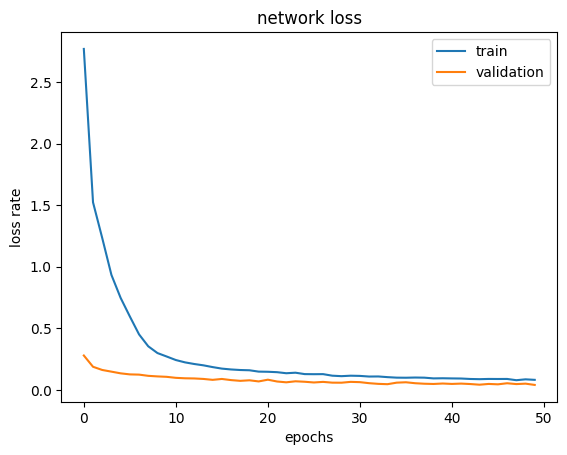

In [19]:
plt.plot(train_history.history["loss"])
plt.plot(validation_history.history["loss"])
plt.title("network loss")
plt.ylabel("loss rate")
plt.xlabel("epochs")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

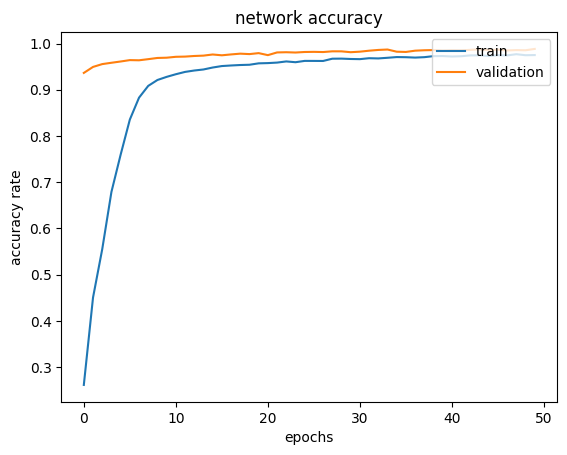

In [20]:
plt.plot(train_history.history["accuracy"])
plt.plot(validation_history.history["accuracy"])
plt.title("network accuracy")
plt.ylabel("accuracy rate")
plt.xlabel("epochs")
plt.legend(["train", "validation"], loc="upper right")
plt.show()

## evaluating on the test set

In [21]:
network.evaluate(x_test, y_test, batch_size=BATCH_SIZE)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.9322 - loss: 0.6232


[0.548750638961792, 0.9387000203132629]

## testing on a single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
True label: 2
Predicted label: 2
Correct prediction: True


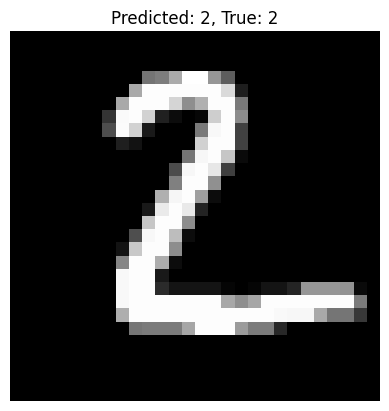

Probability for class 0: 0.0000
Probability for class 1: 0.0000
Probability for class 2: 1.0000
Probability for class 3: 0.0000
Probability for class 4: 0.0000
Probability for class 5: 0.0000
Probability for class 6: 0.0000
Probability for class 7: 0.0000
Probability for class 8: 0.0000
Probability for class 9: 0.0000


In [23]:
# getting a single image to test along with it's label
image_index = 1005  # we can change this for different images
single_image = x_test[image_index:image_index+1]
true_label = y_test[image_index]

prediction = network.predict(single_image)
predicted_label = np.argmax(prediction)  # Converting from logits (softmax probabilites) to class index

# Display results
print(f"True label: {true_label}")
print(f"Predicted label: {predicted_label}")
print(f"Correct prediction: {true_label == predicted_label}")

# Optional: Display the image
import matplotlib.pyplot as plt

plt.imshow(single_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_label}, True: {true_label}')
plt.axis('off')
plt.show()

# showing probabilites for all classes
probabilities = tf.nn.softmax(prediction).numpy()[0]
for i, prob in enumerate(probabilities):
    print(f"Probability for class {i}: {prob:.4f}")